In [12]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [11]:
# Load the mat data
mat_data = scipy.io.loadmat('10 min recording1.mat')
recording1 = mat_data['recording1'].flatten()

fsSpikes = 50000
rawsignal = recording1[20 * fsSpikes:260 * fsSpikes]

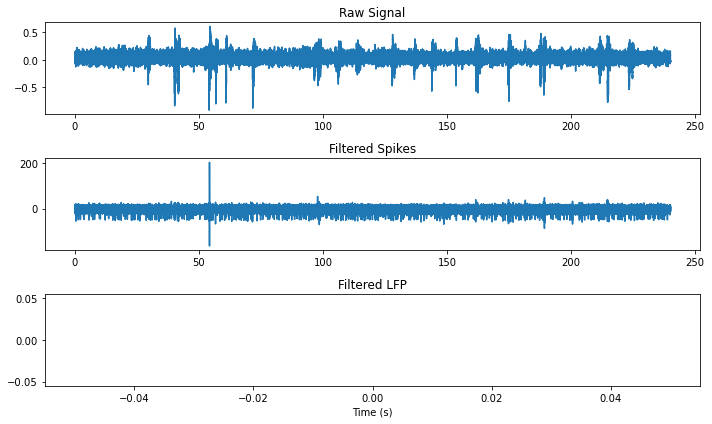

In [26]:
# Bandpass filter for Spikes and LFP
Fc1=300
Fc2=3000
b, a = butter(4, [Fc1, Fc2], btype='band', fs=fsSpikes)
spikes = filtfilt(b, a, rawsignal) * 1000

Fc1=0.5
Fc2=300
b, a = butter(4, [Fc1, Fc2], btype='band', fs=fsSpikes)
LFP = filtfilt(b, a, rawsignal) * 1000

# Plot
time = np.arange(0, len(spikes)) / fsSpikes

plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(time, rawsignal)
plt.title('Raw Signal')
plt.subplot(3, 1, 2)
plt.plot(time, spikes)
plt.title('Filtered Spikes')
plt.subplot(3, 1, 3)
plt.plot(time, LFP)
plt.title('Filtered LFP')


plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()